<a href="https://colab.research.google.com/github/doryeng/web1/blob/master/FBProphet_NC_Soft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 엔씨소프트 주가예측
Facebook Prophet를 이용한 주가 예측

In [12]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [13]:
start = datetime(2000, 1, 1)
end = datetime(2020, 7, 18)

NS = web.DataReader('036570.KS','yahoo',start,end)
NS.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-07-12,29266.699219,29266.699219,29266.699219,29266.699219,600.0,26186.103516
2000-07-13,32766.699219,32766.699219,32766.699219,32766.699219,277200.0,29317.695312
2000-07-14,36666.699219,34833.300781,36666.699219,36666.699219,499200.0,32807.175781
2000-07-17,36666.699219,36666.699219,36666.699219,36666.699219,0.0,32807.175781
2000-07-18,41000.000000,41000.000000,41000.000000,41000.000000,29700.0,36684.363281


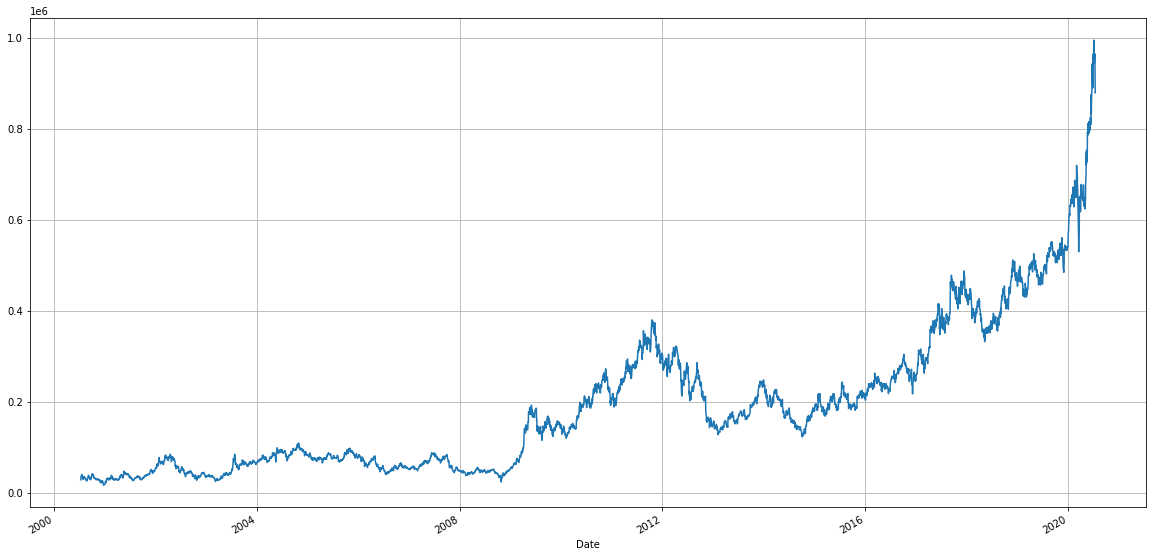

In [14]:
NS['Close'].plot(figsize=(20,10), grid=True);

In [15]:
df = pd.DataFrame({'ds':NS.index, 'y':NS['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2000-07-12,29266.699219
1,2000-07-13,32766.699219
2,2000-07-14,36666.699219
3,2000-07-17,36666.699219
4,2000-07-18,41000.000000


In [16]:
from fbprophet import Prophet

m = Prophet(daily_seasonality=True)
m.fit(df);

future = m.make_future_dataframe(periods=365) # 예측기간은 365일
future.head()   # 예측 시작 5회까지를 보여줌

,ds
0,2000-07-12
1,2000-07-13
2,2000-07-14
3,2000-07-17
4,2000-07-18


In [17]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(300)

,ds,yhat,yhat_lower,yhat_upper
5000,2020-09-21,680242.026486,632823.376766,725199.883967
5001,2020-09-22,680880.853516,637651.941764,724585.613785
5002,2020-09-23,681435.113014,637658.119901,724358.427214
5003,2020-09-24,681456.819193,635539.391429,723579.228748
5004,2020-09-25,681277.870620,635110.936558,726849.022906
...,...,...,...,...
5295,2021-07-13,770326.660963,717971.067698,821163.197803
5296,2021-07-14,770228.922425,719244.828795,819674.559082
5297,2021-07-15,769576.009317,717614.772048,820276.232184
5298,2021-07-16,768706.677337,720626.656643,823857.029741


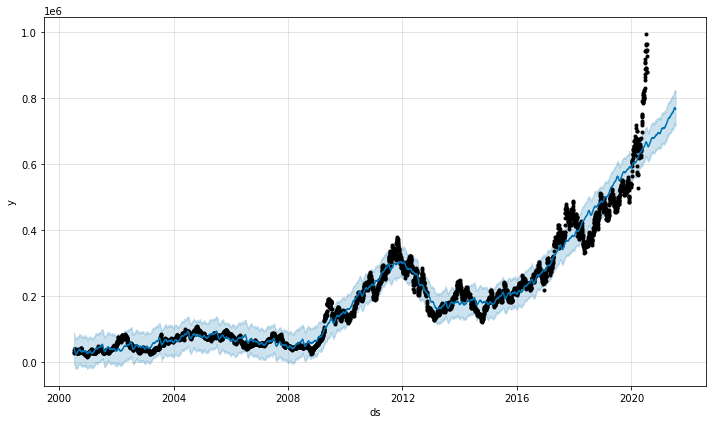

In [18]:
m.plot(forecast);

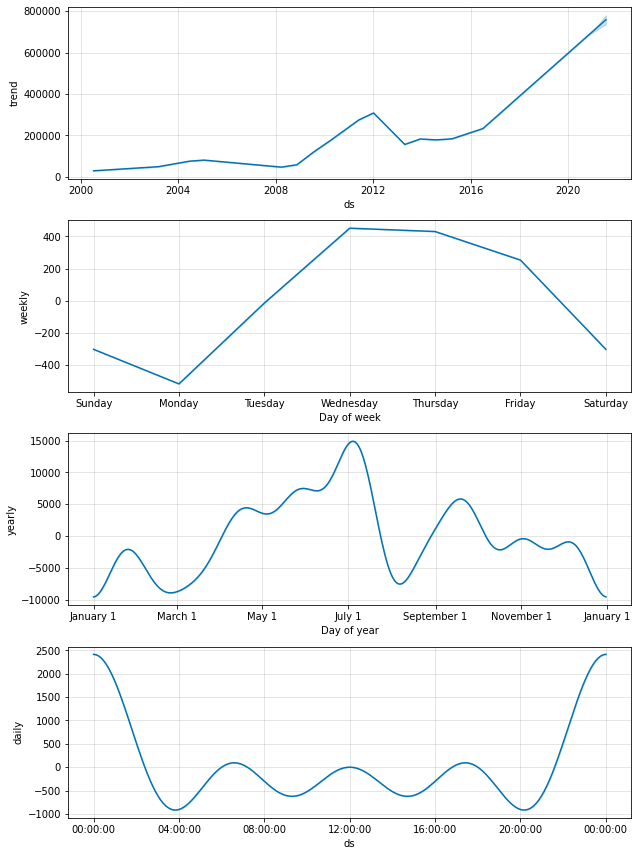

In [19]:
m.plot_components(forecast);